In [94]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [68]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/social.csv")
# url https://thecleverprogrammer.com/2021/10/02/comparison-of-classification-algorithms-in-machine-learning/
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [15]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

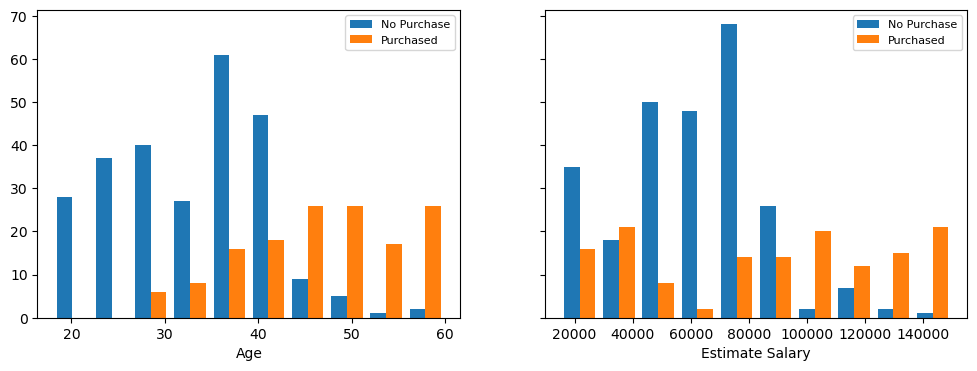

In [105]:
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(12,4))
ax1.hist([data[data['Purchased']==0]['Age'],data[data['Purchased']==1]['Age']],
        label=['No Purchase','Purchased']
       )
ax1.legend(prop={'size': 8})
ax1.set_xlabel('Age')
ax2.hist([data[data['Purchased']==0]['EstimatedSalary'],data[data['Purchased']==1]['EstimatedSalary']],
        label=['No Purchase','Purchased']
       )
ax2.legend(prop={'size': 8})
ax2.set_xlabel('Estimate Salary')
plt.show()

In [107]:
x = np.array(data[["Age", "EstimatedSalary"]])
y = np.array(data["Purchased"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=365)
decisiontree = DecisionTreeClassifier()
logisticregression = LogisticRegression()
knearestclassifier = KNeighborsClassifier()
svm_classifier = SVC()
bernoulli_naiveBayes = BernoulliNB()
passiveAggressive = PassiveAggressiveClassifier()

knearestclassifier.fit(xtrain, ytrain)
decisiontree.fit(xtrain, ytrain)
logisticregression.fit(xtrain, ytrain)
passiveAggressive.fit(xtrain, ytrain)
bernoulli_naiveBayes.fit(xtrain,ytrain)
svm_classifier.fit(xtrain,ytrain)

results = {"Classification Algorithms": ["KNN Classifier", "Decision Tree Classifier", 
                                       "Logistic Regression", "Passive Aggressive Classifier",
                                       "bernoulli_naiveBayes","Support Vector Machine"],
      "Score": [knearestclassifier.score(xtest,ytest), decisiontree.score(xtest, ytest), 
                logisticregression.score(xtest, ytest), passiveAggressive.score(xtest,ytest),
                bernoulli_naiveBayes.score(xtest,ytest),svm_classifier.score(xtest,ytest)]}
score = pd.DataFrame(results)
score

,Classification Algorithms,Score
0,KNN Classifier,0.900
1,Decision Tree Classifier,0.875
2,Logistic Regression,0.775
3,Passive Aggressive Classifier,0.775
4,bernoulli_naiveBayes,0.775
5,Support Vector Machine,0.850


#KNN: K-Nearest Neighbors Algorithm, supervised learning, find K nearest neighbors to a given point based on distance (Euclidean distance). The value or class of the given point is determined by the majority vote or average of the K neighbors. https://www.geeksforgeeks.org/k-nearest-neighbours/

#Decision Tree: Binary splits, feature independent, top down greedy approach - may not reach global optiaml tree, easy to overfitting and senstive to outliers, sensitive to sample size, overfitting to samll sample size or too complex tree for large sample size. Steps:
1. Starting at the root, which has the maximum entropy
2. Asking the best question, split the tree at maximum information gain - most decreased entropy
3. repeating the procedure until reach max depth or min tree elements
https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/

#Logistic Regression: Log(P/(1-P))=x0+b1x1+b2x2+... It is a binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1 https://www.geeksforgeeks.org/understanding-logistic-regression/

#Passive Aggressive Classifier: generally used for large-scale learning and one of few 'online-learning-algorithms', means the input data comes in sequential order and the machine learning model is updated step-by-step.
Passive: if the prediction is correct, keep the model and do not make any changes
Aggressive: if the rpediction is incorrect, make changes to the model, i.e. some change to the model may correct it
https://www.geeksforgeeks.org/passive-aggressive-classifiers/

#Bernoulli Naive Bayes: is a supervised machine learning, it uses Bayes Theorem to predict the posterior probability of any event based on the events that have already occurred. The Naive means all events are independent.
Bernoulli Naive Bayes is a subcategory of the Naive Bayes Algorithm, it is used for the classification of binary features. spam detection, text classification, sentiment analysis.
Bayes Theorem: https://en.wikipedia.org/wiki/Bayes%27_theorem

#Support Vector Machine: Support Vector Machine (SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well it’s best suited for classification. https://www.geeksforgeeks.org/support-vector-machine-algorithm/?ref=lbp
1. Hyperplane: Hyperplane is the decision boundary that is used to separate the data points of different classes in a feature space. In the case of linear classifications, it will be a linear equation i.e. wx+b = 0.2. 
Support Vectors: Support vectors are the closest data points to the hyperplane, which makes a critical role in deciding the hyperplane and margin. 